# Practicals for lecture 1.0

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vigji/python-cimec-2025/blob/main/practicals/Practicals_1.0.ipynb)

## Introduction to `numpy`

#### 1.0.0 Creating numpy arrays

In [1]:
import numpy as np
import sys

In [2]:
# Create a numpy array from this list:

my_list = [3,2,4,5,6,1]

np.array(my_list)


array([3, 2, 4, 5, 6, 1])

In [3]:
# What shape do you expect to see in the array that come from converting
# to numpy this list of lists of lists? Make your prediction, then convert list to array 
# and check the result!
my_list_of_lists = [[[1, 2, 3, 4], [5,6,7,8], [9,10,11,12]], 
                    [[13,14,15,16], [17,18,19,20], [21,22,23,24]]]

many_lists_arr = np.array(my_list_of_lists)
many_lists_arr.shape

(2, 3, 4)

In [4]:
# Initialize a 3D numpy array full of zeros of shape (3, 2, 10). 
# Check its  `ndim` and `shape` attributes to make sure it is correct!

my_array = np.zeros((3, 2, 10))
print(my_array.ndim)
print(my_array.shape)

3
(3, 2, 10)


In [5]:
# Initialize a numpy array full of ones of shape (3, 2, 10). Make it of data type np.uint16!
# Bonus: check its size in memory and compare it with the size of the zeros array we defined above!
# You can use the sys.getsizeof() function to check the size in memory of the array.

my_array_uint16 = np.zeros((3, 2, 10), dtype=np.uint8)
my_array_uint16.dtype

sys.getsizeof(my_array), sys.getsizeof(my_array_uint16)

(624, 204)

In [6]:
# Initialize an array of shape (3, 2, 10) full of nans:

my_array = np.full( (3, 2, 10), np.nan)
my_array

array([[[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]],

       [[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]],

       [[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]])

In [7]:
# Initialize a 1D array containing all even numbers from 0 to 100:
my_array = np.arange(0, 100, 2)
my_array

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])

In [8]:
# Google (or ask chatGPT) how to use np.random to generate normally distributed values. 
# Then, create an array of normally distributed values and shape (4,5,2) called random_matrix.

random_array = np.random.normal(0, 1, (4,5,2))
random_array.shape


(4, 5, 2)

In [9]:
# [Advanced]: 
# 1) Another useful np.random function is shuffle, to change the order of elements in a list/array. 
# try it out! Does it return a new array or does it work inplace?
arr_to_shuffle = np.arange(5)
np.random.shuffle(arr_to_shuffle)

arr_to_shuffle  # this works inplace!

array([4, 3, 2, 0, 1])

In [12]:
# 2) try initializing random arrays of different dtypes and look at their size in memory.
dtypes = [bool, np.uint8, np.uint16, np.float32, float, int, str]
array_size = (1000, 1000)

for dtype in dtypes:
    arr = np.random.random(array_size).astype(dtype)
    print(f"Array of type {dtype} uses {sys.getsizeof(arr) / 1024:.2f} KB")

Array of type <class 'bool'> uses 976.69 KB
Array of type <class 'numpy.uint8'> uses 976.69 KB
Array of type <class 'numpy.uint16'> uses 1953.25 KB
Array of type <class 'numpy.float32'> uses 3906.38 KB
Array of type <class 'float'> uses 7812.62 KB
Array of type <class 'int'> uses 7812.62 KB
Array of type <class 'str'> uses 125000.12 KB


In [ ]:
# 3) From the exercise above, you can imagine that sometimes using u/int8 or u/int16 can spare a lot of space
# when working with arrays. However, those types can only store integers. 
# Can you imagine what you could do to convert float values in the range 0-1 to integers that you can store
# using uint8 or uint16? 
# write a function that takes as input an array of floats between 0 and 1 and convert it in uint16 format 
# maintaning as much information as possible. Write also a function to transform the array back to the original float form.
to_be_compressed = np.random.rand(1000, 1000)

def compress_to_uint16(float_array):
    # Scale floats 0-1 to integers 0-65535 (max uint16)
    return (float_array * 65535).astype(np.uint16)

def decompress_from_uint16(uint16_array):
    # Scale integers 0-65535 back to floats 0-1
    return uint16_array.astype(float) / 65535

# Test compression and decompression
compressed = compress_to_uint16(to_be_compressed)
decompressed = decompress_from_uint16(compressed)

# Print memory usage comparison
print(f"Original array uses {to_be_compressed.nbytes / 1024:.2f} KB")
print(f"Compressed array uses {compressed.nbytes / 1024:.2f} KB")




Original array uses 7812.50 KB
Compressed array uses 1953.12 KB
Max absolute error: 0.00001526
Resolution limit of uint16: 0.00001526


In [16]:
# 4) Can you estimate what is the resolution limit of the uint8 and uint16 encoded arrays? Resolution 
# could be defined as the minimum difference between two numbers that will make them mapped as different values
# in the uint8 or uint16 encoded arrays.

# The teoretical resolution limit of uint8 is 1/255, of uint16 is 1/65535:

resolution_limit_uint8 = 1 / 255
resolution_limit_uint16 = 1 / 65535

print(f"Resolution limit of uint8: {resolution_limit_uint8:.8f}")
print(f"Resolution limit of uint16: {resolution_limit_uint16:.8f}")

# Let's check the max error we got in our compression/decompression:
print(f"Max absolute error: {np.max(np.abs(to_be_compressed - decompressed)):.8f}")


Resolution limit of uint8: 0.00392157
Resolution limit of uint16: 0.00001526
Max absolute error: 0.00001526


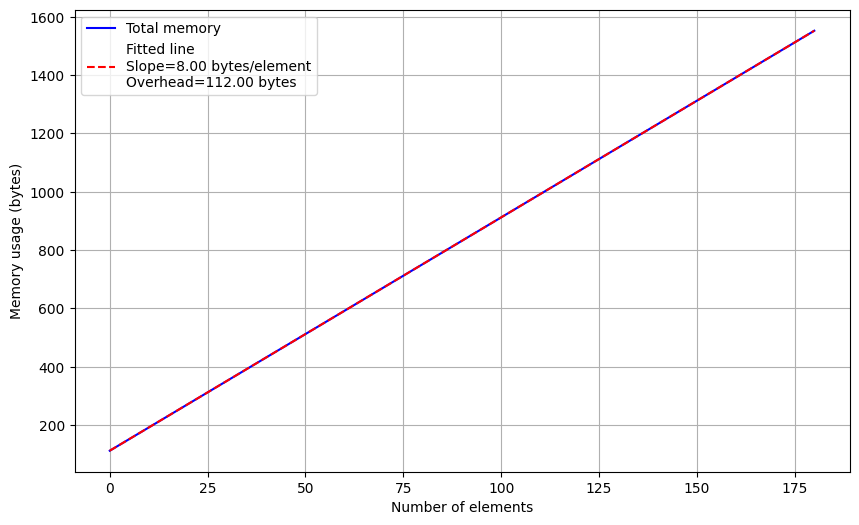

Estimated overhead: 112.00 bytes
Estimated bytes per element: 8.00


In [22]:
# 5) Given a dtype - let's say float - try to figure out how much memory is required to store each number of the array, 
# and how much memory is allocated as an overhead just to initialize the array.

# Create arrays of increasing size and measure memory
sizes = np.arange(0, 200, 20)
memory_usage = []

for size in sizes:
    arr = np.zeros(size, dtype=float)
    memory_usage.append(sys.getsizeof(arr))

memory_usage = np.array(memory_usage)

# Plot memory usage vs array size
f, ax = plt.subplots(figsize=(10, 6))
ax.plot(sizes, memory_usage, 'b-', label='Total memory')

# Fit a line to estimate overhead
coeffs = np.polyfit(sizes, memory_usage, 1)
fitted_line = coeffs[0] * sizes + coeffs[1]
plt.plot(sizes, fitted_line, 'r--', label=f'Fitted line\nSlope={coeffs[0]:.2f} bytes/element\nOverhead={coeffs[1]:.2f} bytes')

ax.set(xlabel='Number of elements', ylabel='Memory usage (bytes)')
ax.grid(True)
ax.legend()
plt.show()

print(f"Estimated overhead: {coeffs[1]:.2f} bytes")
print(f"Estimated bytes per element: {coeffs[0]:.2f}")


#### 1.0.1 Indexing and plotting

In [23]:
# You are given this 2D array:
np.random.seed(42)
random_array = np.random.normal(0, 1, (4, 5))

# use numpy indexing to address the element (0, 1) (first row, second column) from random_array:
print(random_array)

random_array[0, 1]

[[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337]
 [-0.23413696  1.57921282  0.76743473 -0.46947439  0.54256004]
 [-0.46341769 -0.46572975  0.24196227 -1.91328024 -1.72491783]
 [-0.56228753 -1.01283112  0.31424733 -0.90802408 -1.4123037 ]]


-0.13826430117118466

In [24]:
# use numpy indexing to select all values in the second row from random_matrix above:

random_array[1, :]

array([-0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004])

In [25]:
# Set to replace with np.nan all the negative values in the matrix below:
np.random.seed(42)
random_matrix = np.random.normal(0, 1, (3,2))
print(random_matrix)

selector = random_matrix < 0
print(selector)

random_matrix[selector] = np.nan

random_matrix

[[ 0.49671415 -0.1382643 ]
 [ 0.64768854  1.52302986]
 [-0.23415337 -0.23413696]]
[[False  True]
 [False False]
 [ True  True]]


array([[0.49671415,        nan],
       [0.64768854, 1.52302986],
       [       nan,        nan]])

In [26]:
# fMRI data

# The code snippet below loads a single fmri scan into an array (fmri_array).
# This scan consists of 50x59 voxels in each slice, 50 axial slices, 168 timepoints.

# First, run this cell to load the data:
# !pip install nilearn
from nilearn import datasets, image, plotting
data = datasets.fetch_development_fmri(n_subjects=1)
fmri_img = image.load_img(data.func[0])
fmri_array = image.get_data(fmri_img)

In [27]:
# Print out the shape of the array to check the dimensions, and find the time axis (remember, we have 168 timepoints).
print(fmri_array.shape)

# Select the volume correponding to the 100th timepoint, then print the shape of the volume to check the dimensions
# and if they make sense to you given the specs of the scan given above:
volume = fmri_array[:, :, :, 100]

(50, 59, 50, 168)


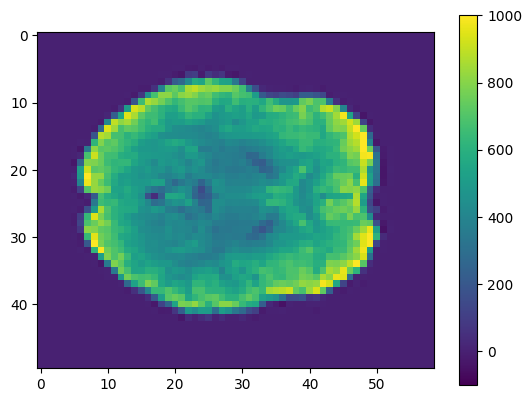

In [29]:
# Now slice the volume on the 3rd axis to get the 20th slice, and plot it using plt.imshow:
# Bonus: check the documentation of plt.imshow and play with the vmin and vmax arguments to control the contrast range:

plt.imshow(volume[:, :, 20], vmin=-100, vmax=1000)
plt.colorbar()
plt.show()

In [42]:
# Lets say that you know that timepoints 30-40 and 99-114 are corrupted by high levels of motion, 
# so you want to remove them (an approach known as motion censoring).
# Create a boolean array that indicates which timepoints need to be censored - a censoring timeseries essentially. 
# (Hint: you can do this by creating a boolean array of zeros and use slicing to set the correct values to 1)
# 
# The number of timepoints in your array should be match the number of timepoints in your scan.

censored_timeseries = np.ones(fmri_array.shape[3], dtype=bool)
censored_timeseries[30:40] = False
censored_timeseries[99:114] = False

fmri_array_filteres = fmri_array[:, :, :, censored_timeseries]


# Now apply the censoring timeseries to your scan to remove the corrupted timepoints. 
# Check that the number of remaining timepoints is as you expect.
 
# We have as many timepoints as true values in censored_timeseries:
print(fmri_array_filteres.shape[3], sum(censored_timeseries))

143 143
